<a href="https://colab.research.google.com/github/ecjellinek/dogfoodpca/blob/main/PCA_notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering
#### Heatmaps, HCA, and PCA with Class Prediction

Code is in R - https://github.com/IRkernel/IRkernel
This is what is called a jupyter notebook that can act as a workspace, coding playground, and a report generator for data analysis. It allows us to modify and run code in a browser while the actually computer that is running the code is hosted elsewhere. It also makes it easy to send around well documented code that other scientists can run on their own machines, provided they have jupyter notebooks set up as well.

### Data Analysis
---

In [1]:
install.packages(c("reshape2","ggplot2","gplots","RColorBrewer","ggfortify","class"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘plyr’, ‘Rcpp’, ‘gtools’, ‘caTools’, ‘gridExtra’




In [3]:
library(reshape2)
library(ggplot2)
library(gplots)
library(RColorBrewer)
library(ggfortify)
library(class)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




### load data

In [4]:
data <- read.csv("./dogfood1.csv")


### select appropriate data
Notice that I have renamed the last entry in this data set as "Unknown". Since we will be later predicting its PCA scores based on a model will build with the other samples. If you have a whole other matrix of samples, prepare that matrix to look exactly like the matrix will build the model with. Then we will use it later.

In [6]:
analytes <- (as.matrix(data[1:16,1]))
#rt <- (as.matrix(data[1:16,2]))
signals <- data.matrix(data[1:16, c(1:13)])
#signals[is.na(signals)] <- 100000 # assign LOD value to empty cells
rownames(signals) <- c(1:16)
colnames(signals) <- c("Adult_0","Adult_1","Adult_2","Stella_0","Stella_1","Stella_2","Wild_0","Wild_1","Wild_2","Puppy_0","Puppy_1","Puppy_2","Unknown")

### check if everything looks okay
The function ```head()``` just shows the top of our data matrix, if you want to see the whole thing just type in the name of the variable ```signals``` and hit shift-enter.

In [7]:
head(signals)


,Adult_0,Adult_1,Adult_2,Stella_0,Stella_1,Stella_2,Wild_0,Wild_1,Wild_2,Puppy_0,Puppy_1,Puppy_2,Unknown
1,0.002740088,0.002981665,0.002595743,0.128501195,0.002498806,0.002388108,0.002755544,0.004212001,0.003280611,0.003115157,0.002872388,0.003547671,0.000737489
2,0.511878730,0.188092893,0.002595743,0.003819166,0.002498806,0.002388108,0.002755544,0.004212001,0.003280611,0.504142936,0.387687483,0.314366537,0.098347952
3,0.002740088,0.002981665,0.016423558,0.146568650,0.037390791,0.034112020,0.123333949,0.050449272,0.055028982,0.003115157,0.002872388,0.003547671,0.038705111
4,0.543001776,0.268274018,0.066902793,0.262192101,0.223421859,0.244546762,0.002755544,0.004212001,0.003280611,0.535471865,0.386912350,0.425415339,0.154696583
5,0.100119638,0.091765488,0.005088573,0.003819166,0.010016133,0.015234051,0.008419188,0.004212001,0.003280611,0.179209835,0.161347355,0.200143385,0.057569928
6,0.002740088,0.002981665,0.002595743,0.017332851,0.032061586,0.043695322,0.002755544,0.004212001,0.003280611,0.003115157,0.002872388,0.003547671,0.000737489


### Make our Heat Maps

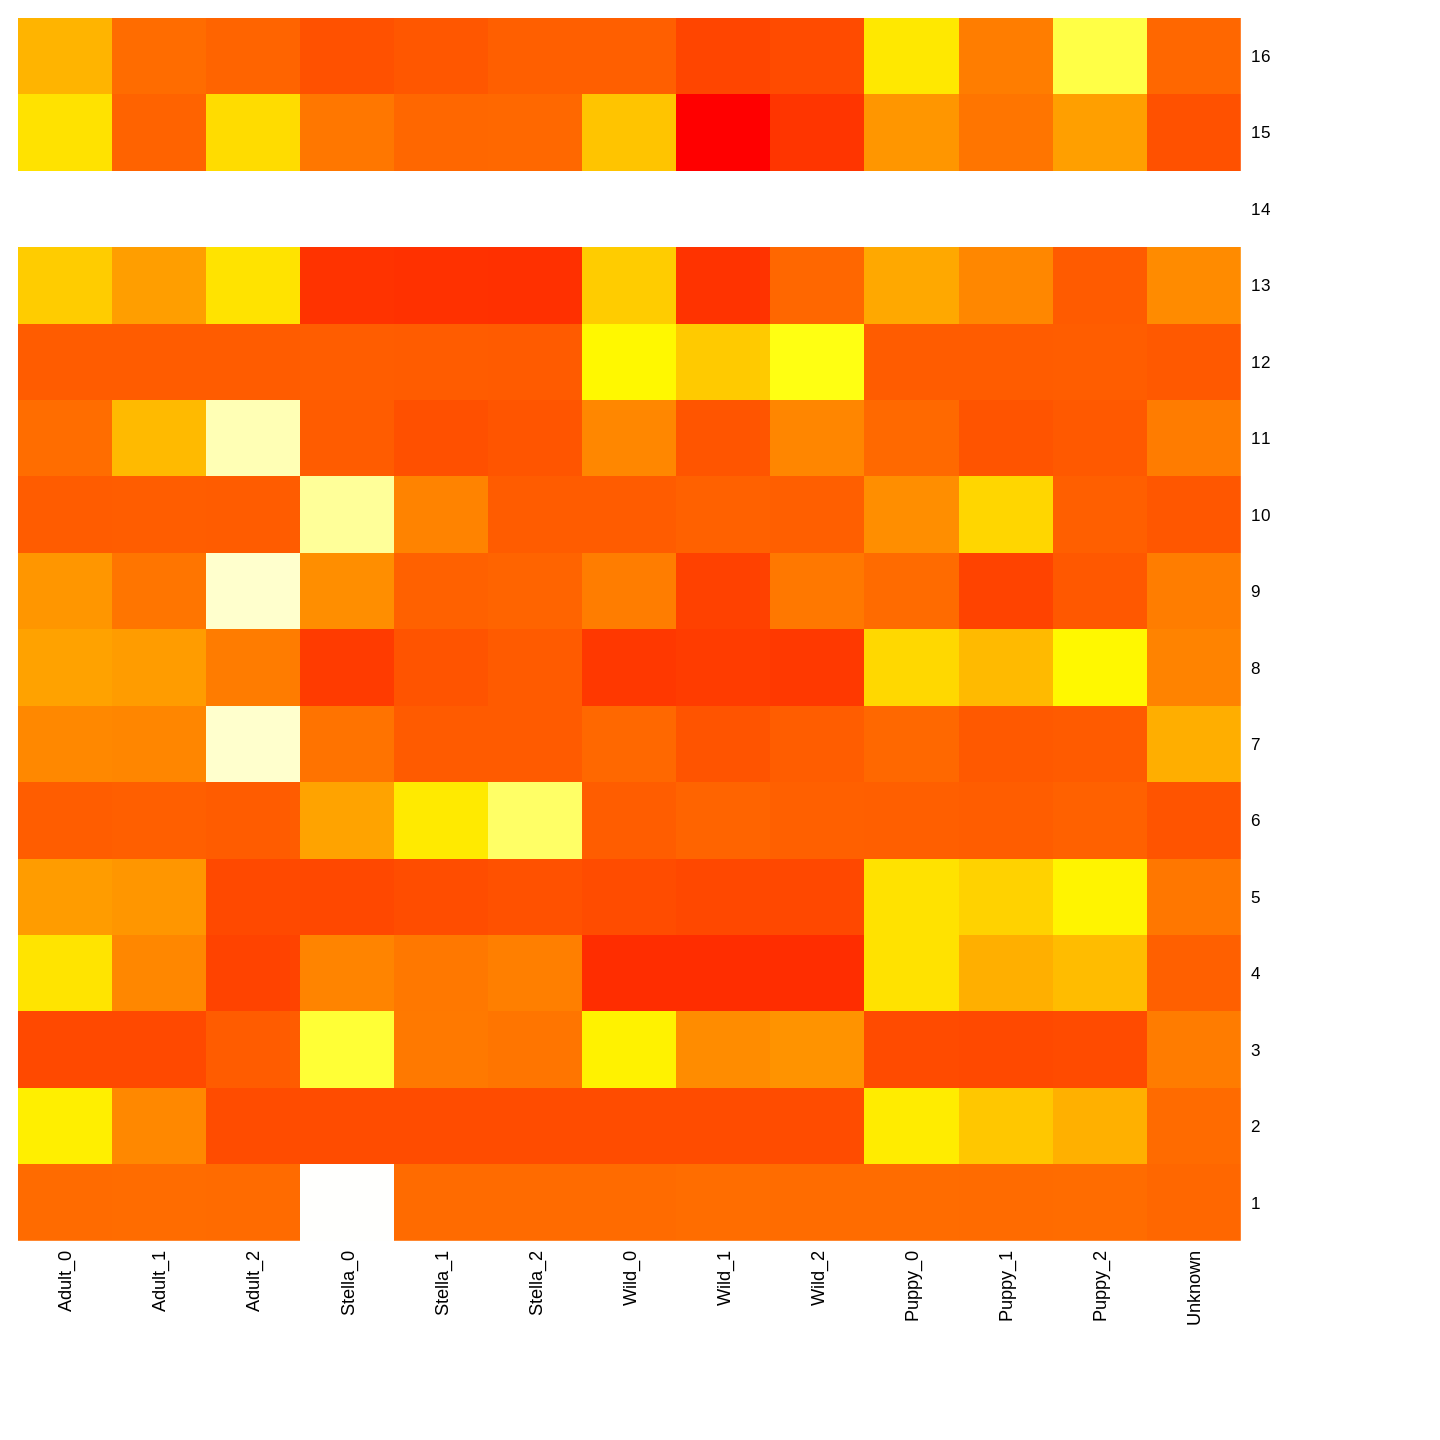

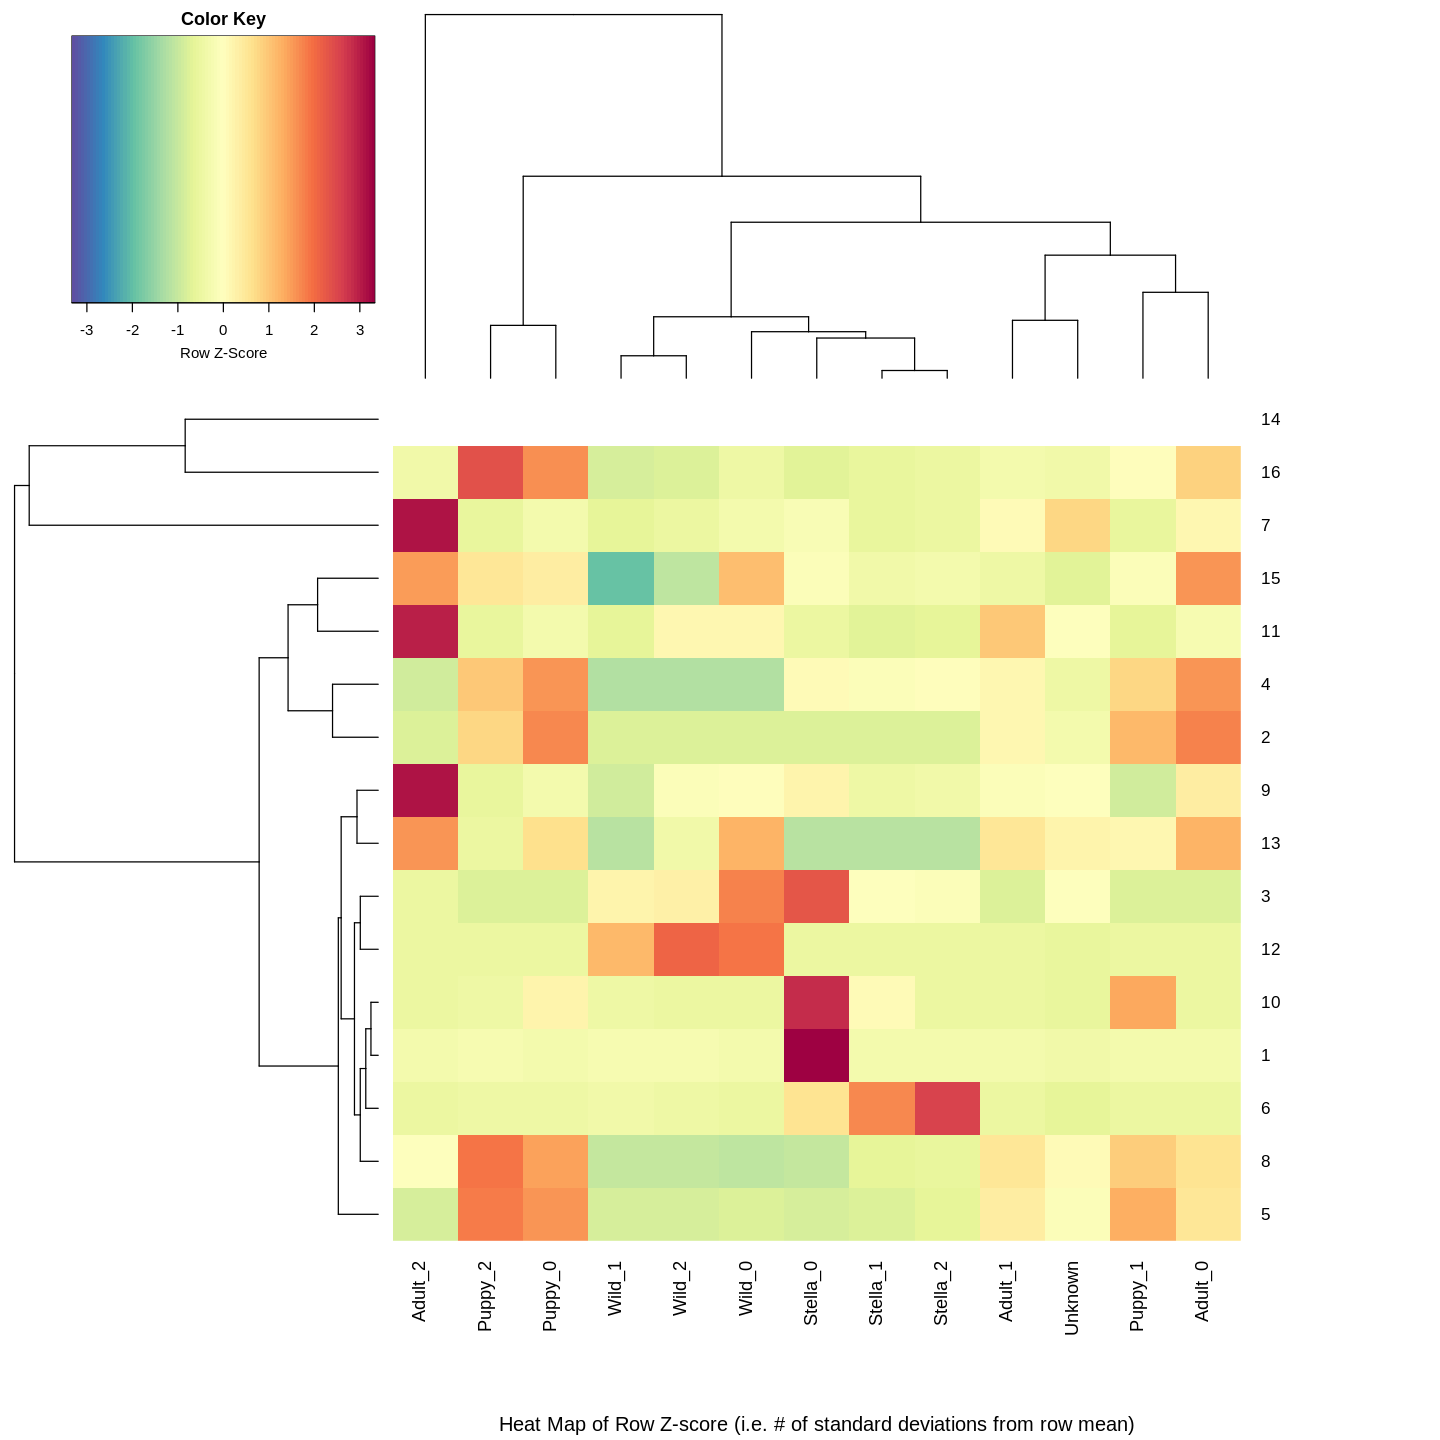

In [8]:
options(repr.plot.width=12, repr.plot.height=12)
heatmap(signals,
    Rowv=NA,
    Colv=NA,
    col = heat.colors(256),
    scale="row",
    margins=c(10,10),
    labRow=c(1:29))

Colors=rev(brewer.pal(11,"Spectral"))
Colors=colorRampPalette(Colors)(100)
heatmap.2(signals,
    xlab = "Heat Map of Row Z-score (i.e. # of standard deviations from row mean)",
    Rowv = TRUE,
    distfun = dist,
    hclustfun = hclust,
    dendrogram = c("both"),
    reorderfun = function(d, w) reorder(d, w),
    scale = c("row"),
    na.rm=TRUE,
    trace=c("none"),
    margins = c(10, 10),
    col=Colors,
    density.info=c("none"))

### Select calibration and test data

In [9]:
cal <- signals[ ,1:12]
test <- signals[ ,13]

### Transformation of data
We are using a log transform of our data to make them more parametric for PCA as well as scale our data so that larger peaks don't simply dominate the model. There are more data transformations we could do here, but this is really all this data set needs. During our PCA function call we will also allow the program to "mean center" our data, even further correcting our data set so that large peaks don't dominate the model.

In [10]:
cal.log <- t(log(cal))
test.log <- t(log(test))

### Label Classes for PCA
Notice that one sample has been left out, our "Unknown"

In [11]:
Class <- c("Adult","Adult","Adult","Stella","Stella","Stella","Wild","Wild","Wild","Puppy","Puppy","Puppy")

### Add Class information to data table and check to make sure everything looks okay

In [12]:
cal.log <- data.frame(Class, cal.log)

### run PCA
Make sure we are selecting the appropriate columns of cal.log. We do not want to use our "Class" column yet. Notice we are using mean centering by passing ```center = TRUE``` as well as not autoscaling our data with ```scal = FALSE```. Our rank is 4, meaning we are building a model with only 4 principle components, although we will likely only really be looking at the first two.

In [13]:
cal.pca <- prcomp(na.omit(cal.log[,2:16]), center = TRUE, scale. = FALSE, rank = 4)

### Output Summary information for our PCA Model

In [14]:
summary(cal.pca)

Importance of first k=4 (out of 12) components:
                          PC1    PC2    PC3     PC4
Standard deviation     4.0728 2.4463 1.5521 1.35682
Proportion of Variance 0.5969 0.2154 0.0867 0.06625
Cumulative Proportion  0.5969 0.8123 0.8990 0.96525

### A note about plots in Jupyter Notebooks
For all plots in this file I've included two lines that are "commented out". One above ```png("imagename.png")``` that opens up a png file for writing of the image to disc and ```dev.off()``` which closes the image file for writing and makes it accessable in other programs. Simply remove the "#" at the start of the lines if you want to save plots programatically to the jupyter notebook environment file system. This is probably handy if you are making lots of plots for different models and want to organize the figures for a PPT or something. If you are just running a couple you can also just right click the image in the browser and click "save image as", to download it to your computer.

### Variance Explained by Model
Lets normalize our variances to the total variance, giving us a percentage of variance explained per principle component

In [ ]:
variance <- cal.pca$sdev^2
Percent_Variance <- 100*(variance/sum(variance))
Principle_Component <- c(1:length(Percent_Variance))
variance_explained <- data.frame(Principle_Component,Percent_Variance)
variance_explained

Principle_Component,Percent_Variance
<int>,<dbl>
1,5.969512e+01
2,2.153528e+01
3,8.669759e+00
4,6.625088e+00
5,1.688264e+00
6,1.190845e+00
7,3.112048e-01
8,1.420708e-01
9,9.043004e-02


### Variance Explained Plot

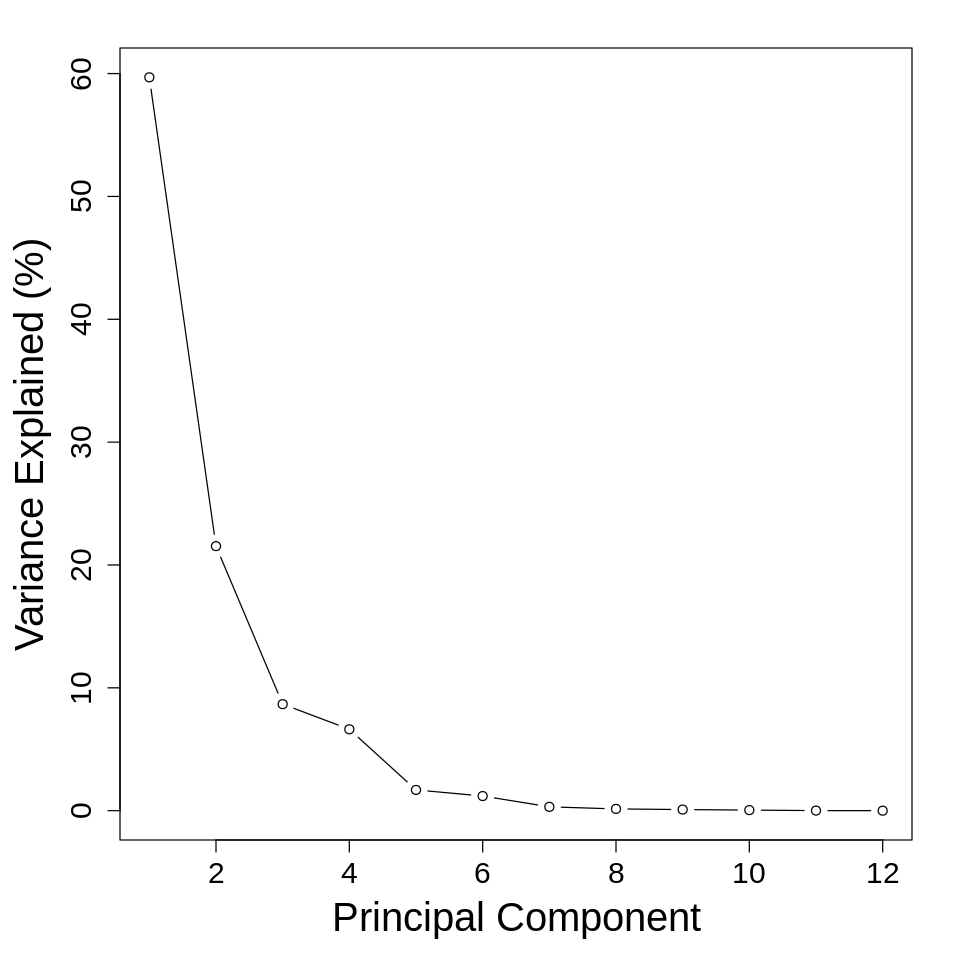

In [ ]:
#png("variances.png")
options(repr.plot.width=8, repr.plot.height=8)
par(mar = c(5, 5, 2, 2))
plot(variance_explained$Percent_Variance,
     type = "b",
     xlab = "Principal Component",
     ylab = "Variance Explained (%)",
     cex.main=2,
     cex.lab=2,
     cex.axis=1.5)
#dev.off()

### Scores
To get information about our scores, that is located in our model as ```cal.pca$x```

In [ ]:
cal.pca$x

,PC1,PC2,PC3,PC4
Adult_0,4.659486,1.08967413,0.620544272,0.07451625
Adult_1,3.587839,1.02231624,0.641520151,-0.17630724
Adult_2,-1.094715,0.80737836,4.057455944,0.73742873
Stella_0,-2.884689,-4.35167920,-0.675367332,3.11250248
Stella_1,-1.810051,-3.52522966,0.156956703,-1.25769267
Stella_2,-1.648176,-3.18861254,0.816112806,-2.40186259
Wild_0,-4.764723,3.48086271,0.009326916,0.48540171
Wild_1,-4.816924,1.09870591,-2.078240263,-0.99270235
Wild_2,-4.897057,2.80031632,-0.539542751,0.10444289
Puppy_0,4.888558,0.40403928,-0.710156256,0.60214649


### Scores Plot

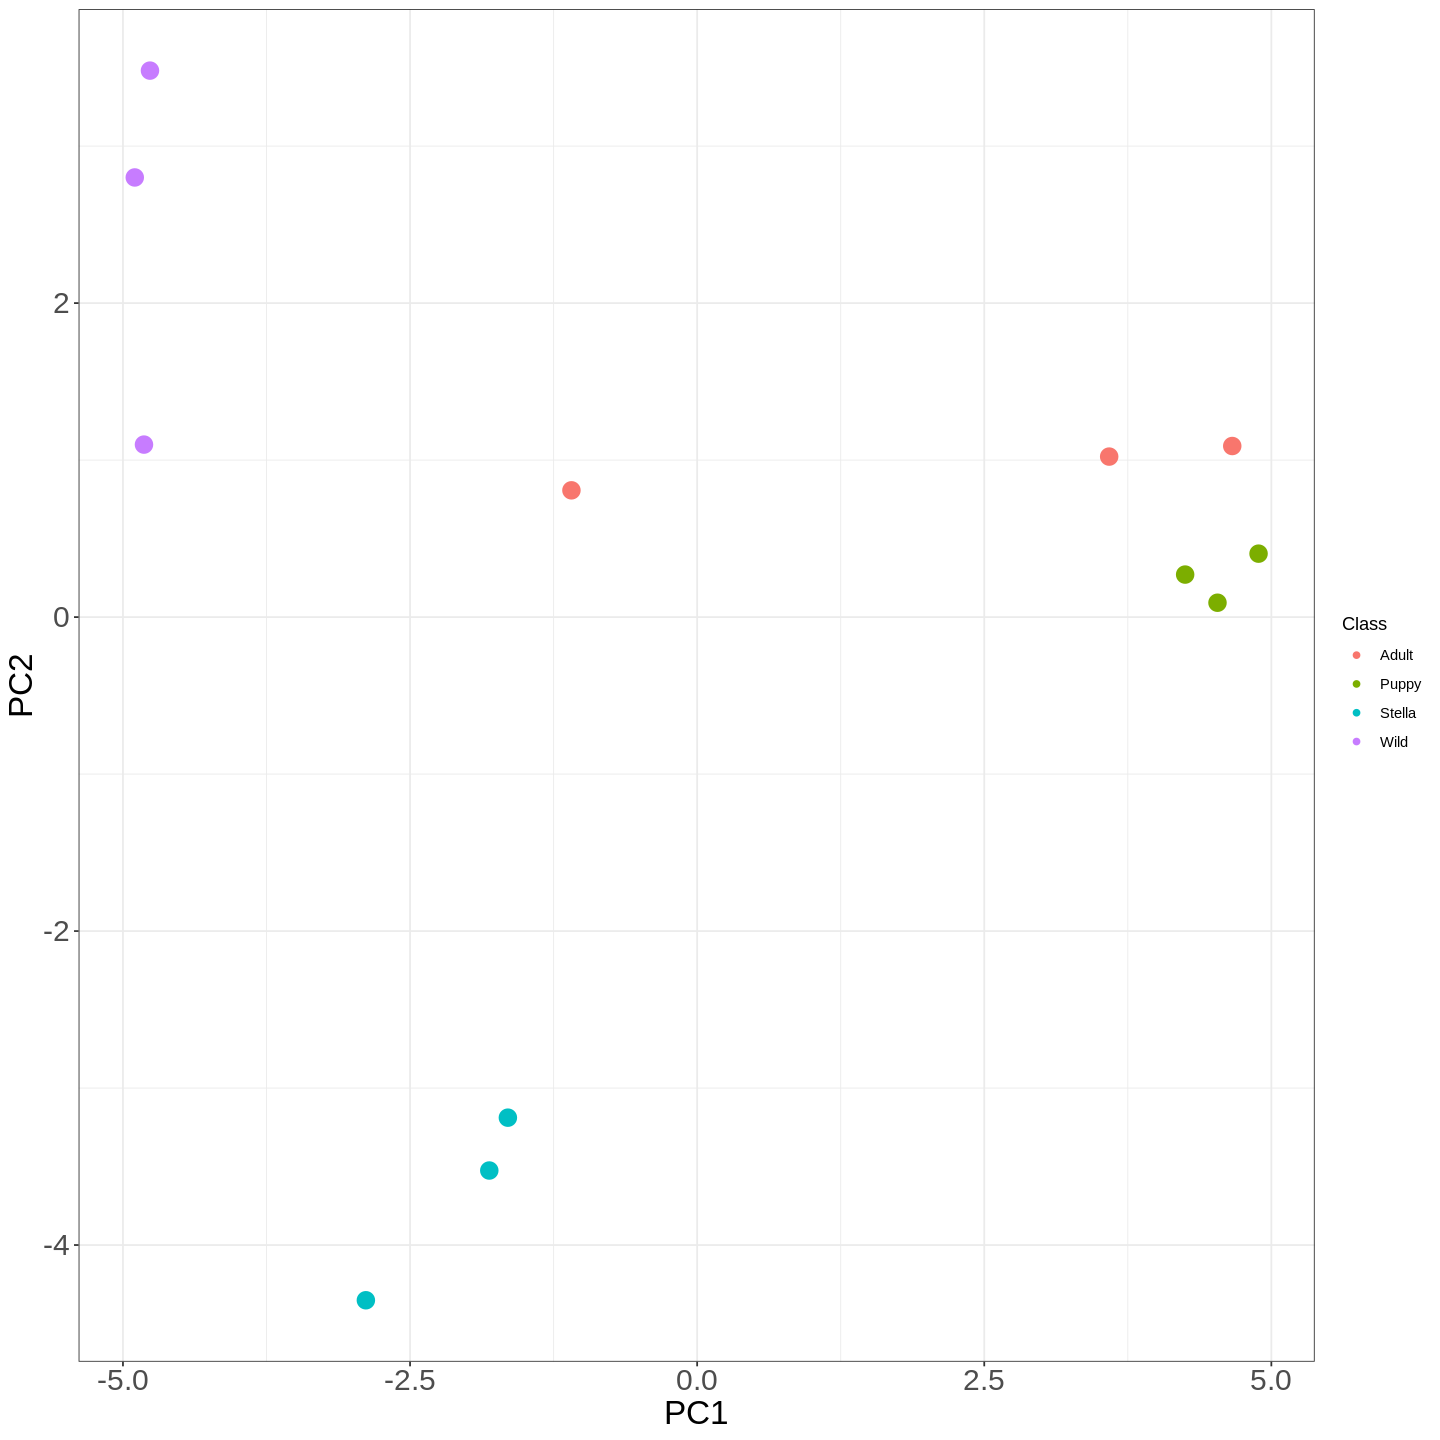

In [15]:
scores <- as.data.frame(cal.pca$x)
#png("scores.png")
ggplot(scores, aes(x=PC1, y=PC2, color=Class, size=3)) +
    theme_bw() +
    geom_point() +
    scale_size(guide="none") +
    theme(axis.text.y = element_text(size=18), axis.title = element_text(size=20)) +
    theme(axis.text.x = element_text(size=18))
#dev.off()

### Prepare Loadings Plots
In this particular R package "prcomp" our loadings are also known as pca rotations. We can access those values by our model variable ```cal.pca$rotation``` in this file. Notice that "cal.pca" refers to the storage of all our model data, and a "$" can refer to various sorts of data that

In [16]:
rotations <- data.frame(cal.pca$rotation[,1],cal.pca$rotation[,2])
colnames(rotations) <- c("PC1","PC2")
Peak_Number = c(1:15)
rotations <- data.frame(Peak_Number,rotations)
df <- melt(rotations, id.vars='Peak_Number')

### Plot Loadings

Warning message:
“Continuous limits supplied to discrete scale.
ℹ Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


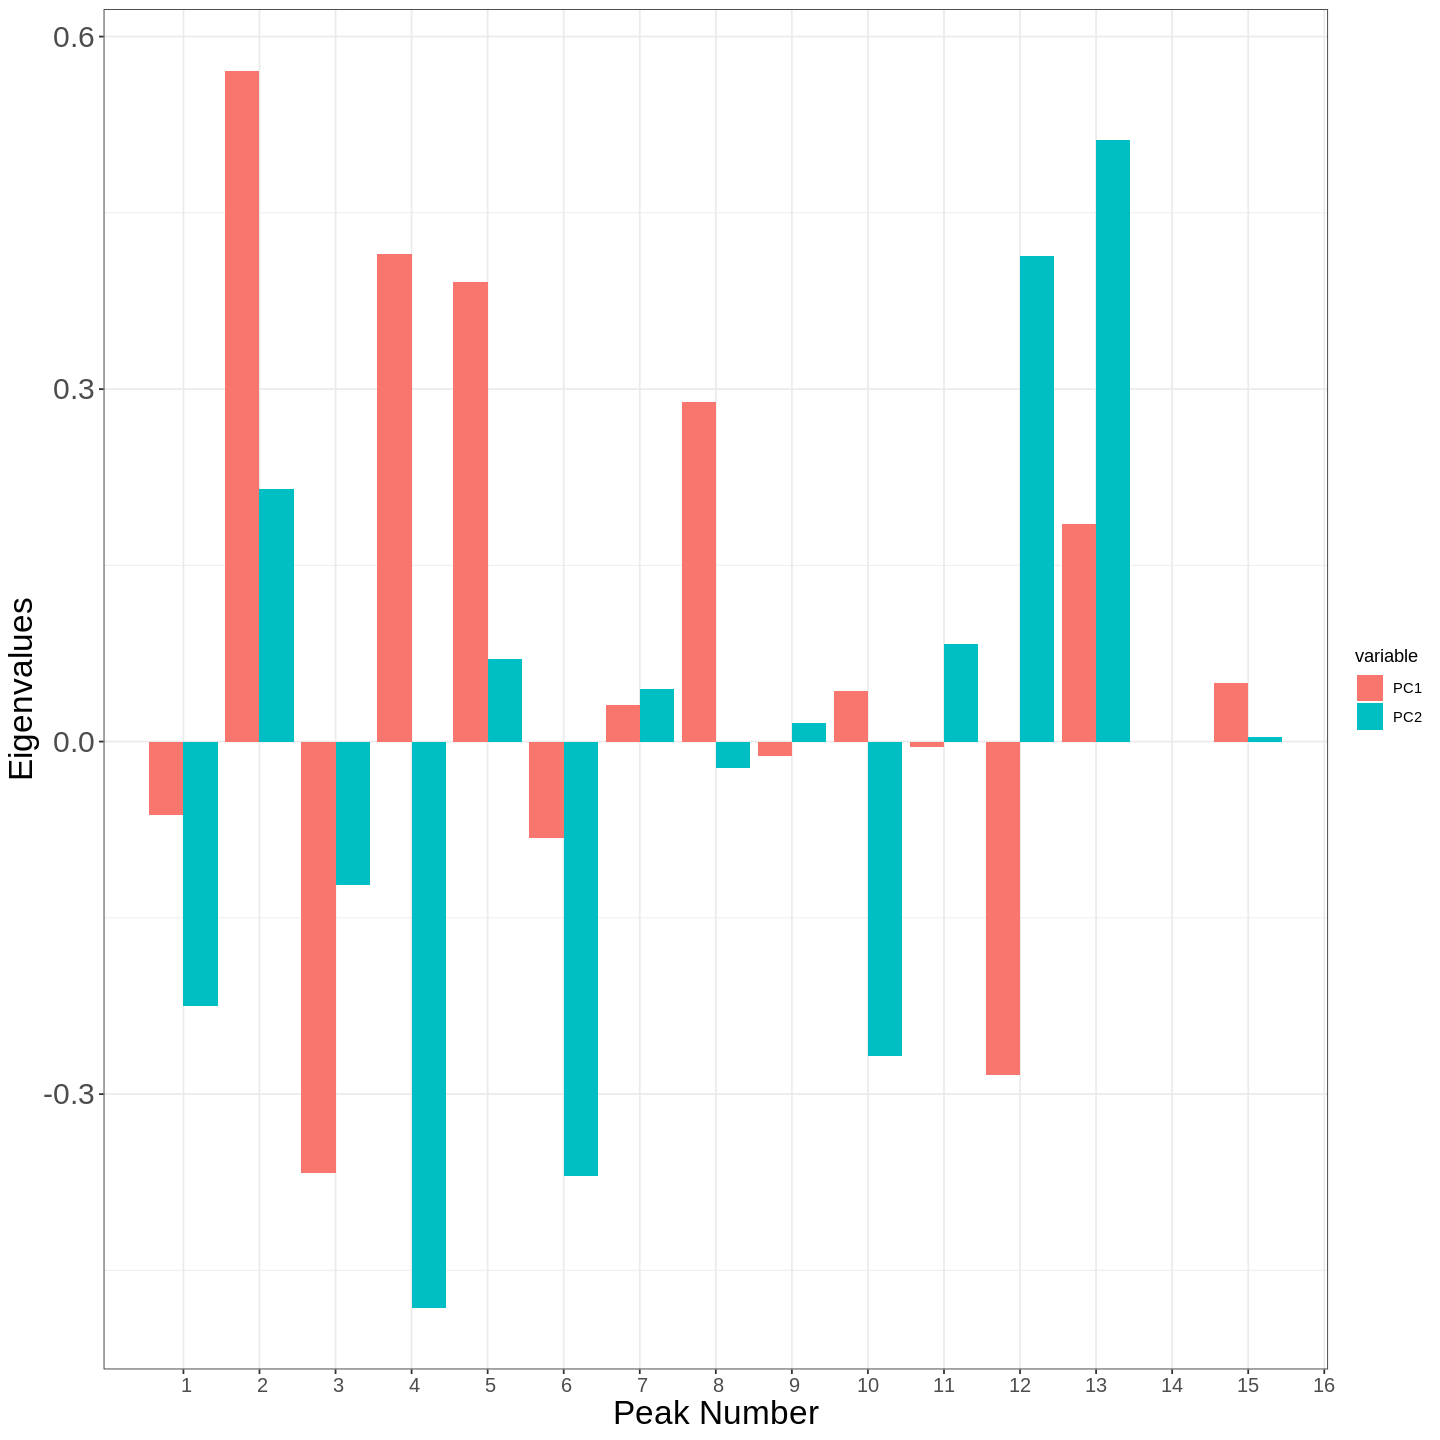

In [17]:
#png("loadings.png")
options(repr.plot.width=12)
ggplot(df, aes(x=Peak_Number, y=value, fill=variable)) +
    theme_bw() +
    geom_bar(stat='identity', position='dodge') +
    scale_x_discrete(limit = c(1:16)) +
    labs(x = "Peak Number", y = "Eigenvalues") +
    theme(axis.text.y = element_text(size=18), axis.title = element_text(size=20)) +
    theme(axis.text.x = element_text(size=12))

#dev.off()

### Predict the scores of another sample with above model
In this example we are only using one extra sample, but we can also input an array (or matrix, or data.frame) of samples to predict scores from. In more specific terms, the ```test.log``` variable can be our matrix of values.

In [18]:
colnames(test.log) <- colnames(cal.log)[1:16]
test.scores <- predict(cal.pca, test.log)

### Put all scores, cal and test, in a matrix together

In [19]:
scores_all <- rbind(cal.pca$x, test.scores)
rownames(scores_all) <- c(Class,"Unknown")
Class_All <- rownames(scores_all)
scores_all

,PC1,PC2,PC3,PC4
Adult,4.659486,1.08967413,0.620544272,0.07451625
Adult,3.587839,1.02231624,0.641520151,-0.17630724
Adult,-1.094715,0.80737836,4.057455944,0.73742873
Stella,-2.884689,-4.35167920,-0.675367332,3.11250248
Stella,-1.810051,-3.52522966,0.156956703,-1.25769267
Stella,-1.648176,-3.18861254,0.816112806,-2.40186259
Wild,-4.764723,3.48086271,0.009326916,0.48540171
Wild,-4.816924,1.09870591,-2.078240263,-0.99270235
Wild,-4.897057,2.80031632,-0.539542751,0.10444289
Puppy,4.888558,0.40403928,-0.710156256,0.60214649


### Plot all scores together in one plot

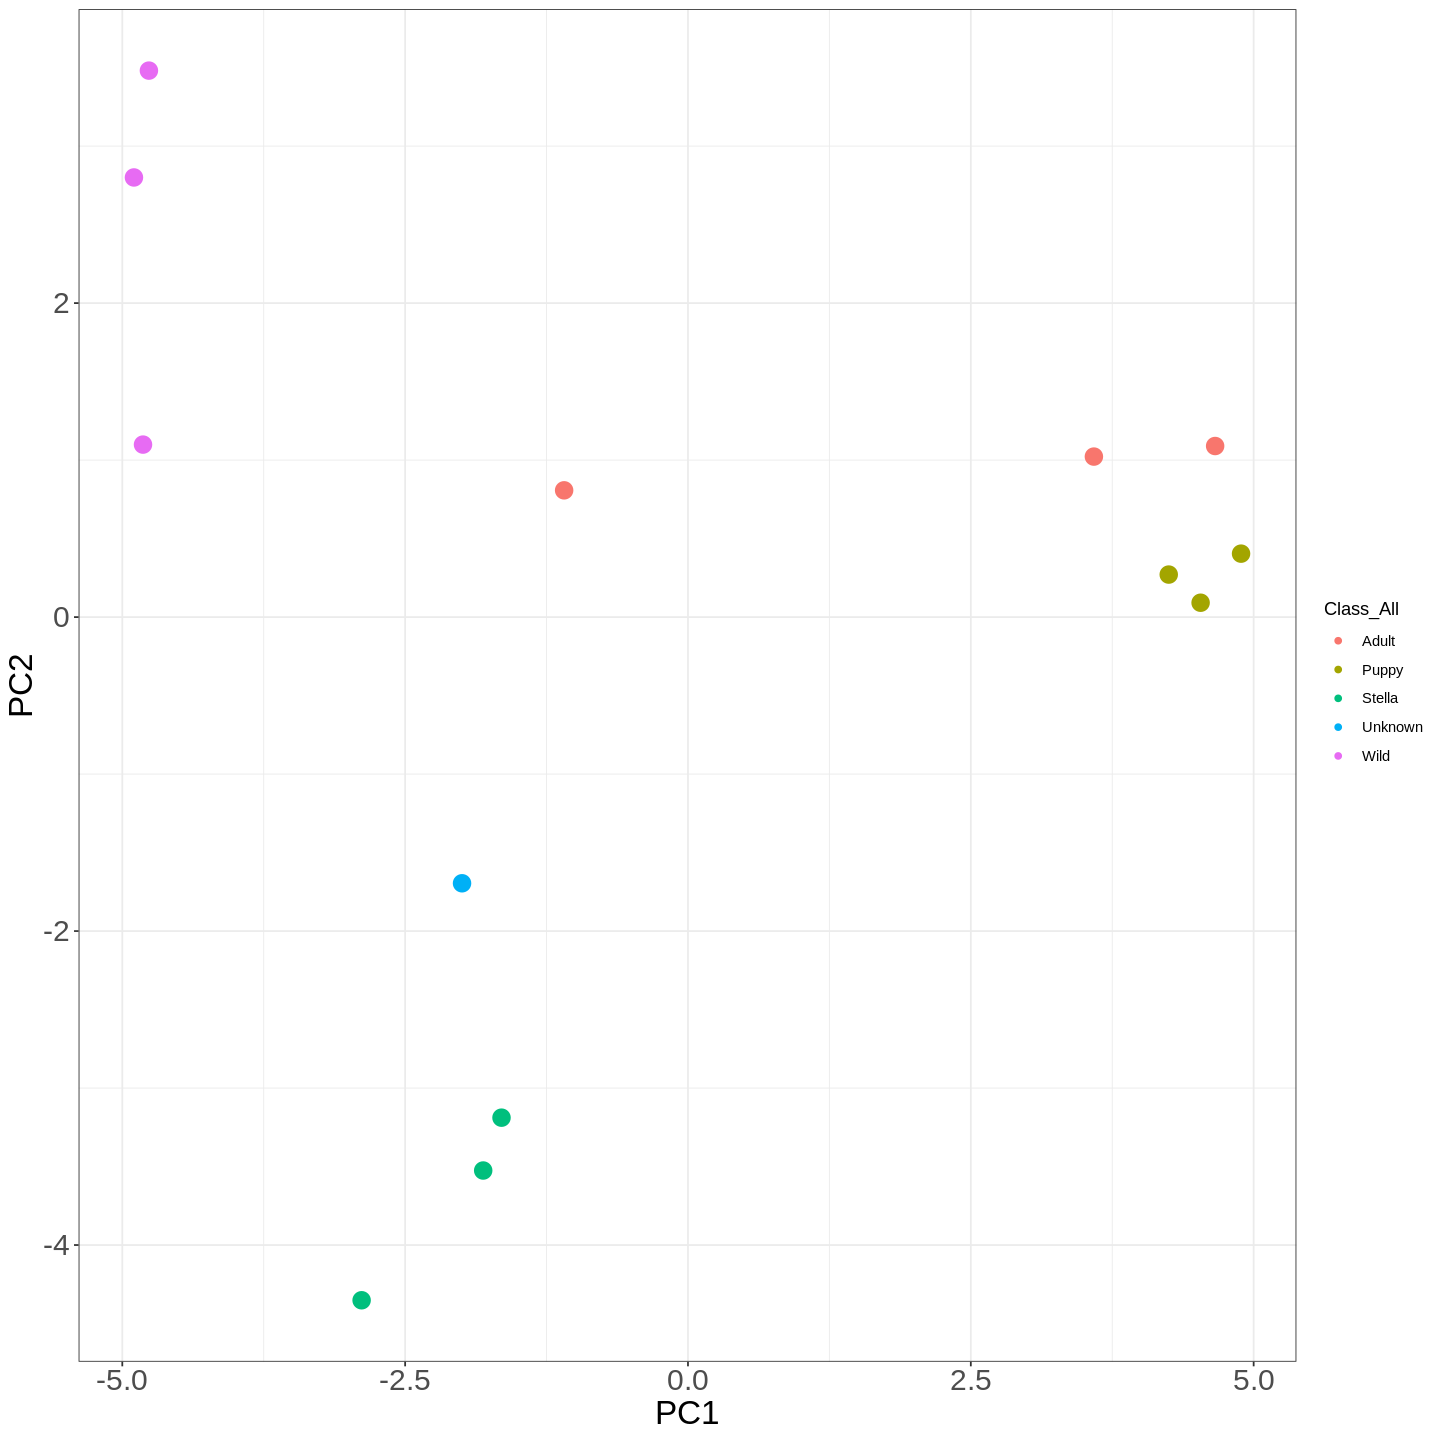

In [32]:
#png("scores_cal_and_test.png")
options(repr.plot.width=12)
ggplot(as.data.frame(scores_all), aes(x=PC1, y=PC2, color=Class_All, size=4)) +
    theme_bw() +
    geom_point() +
    scale_size(guide=FALSE) +
    theme(axis.text.y = element_text(size=18), axis.title = element_text(size=20)) +
    theme(axis.text.x = element_text(size=18))

#dev.off()

KNN Distance Calculations for single Unknown

In [21]:
distance <- list()
for (i in 1:nrow(cal.pca$x)) {
  point <- as.numeric(cal.pca$x[i,])
  unknownpoint <- as.numeric(test.scores)
  distance[[i]] <- sqrt(sum((point - unknownpoint)^2))
}

distances <- t(as.data.frame(distance))
colnames(distances) <- c("Distances")
rownames(distances) <- Class
distances

,Distances
Adult,9.274945
Adult,8.609064
Adult,9.259885
Stella,4.842746
Stella,6.433026
Stella,7.572198
Wild,7.774677
Wild,5.956639
Wild,7.187340
Puppy,8.438030




### k-nearest neighbors calculations (not yet functional)

In [22]:
dfood_train <- cal.pca$x
dfood_test <- test.scores
test_pred <- knn(
                 train = dfood_train,
                 dfood_test,
                 cl = Class,
                 k=2
                 )


In [23]:
actual <- "Stella"
cm <- table(actual,test_pred)
cm

        test_pred
actual   Adult Puppy Stella Wild
  Stella     0     0      0    1

In [24]:
accuracy <- sum(diag(cm))/length(actual)
sprintf("Accuracy: %.2f%%", accuracy*100)

[1] "Accuracy: 0.00%"

In [25]:
class(test_pred)


[1] "factor"